In [1]:
library(ggplot2)
library(dplyr)
library(gplots)
library(reshape2)
library(umap)
library(ggExtra) 
library(pals)
library(RColorBrewer)

filtered <- read.table("../7614_final_summary_anno3.txt",header=T,sep="\t")

names(filtered)

unique(filtered$Hemisphere)
unique(filtered$Region)
unique(filtered$Punch)
unique(filtered$Cell_Type)
unique(filtered$Location)
unique(filtered$AntPost)
unique(filtered$DorVen)
unique(filtered$Organ)
unique(filtered$Note)

print(paste("A total of variant calls: ",nrow(filtered)))
print(paste("The number of variants included in ampliseq: ", length(unique(filtered$CHROM.POS.REF.ALT))))

filtered2 <- subset(filtered, Sort_main %in% c('1')) # restrict annotation of variants based on the only selected sorted sample information
filtered2$Punch<-as.character(filtered2$Punch)
filtered2$Note<-as.character(filtered2$Note)

mosaic_filtered <- filtered2[filtered2$Mosaic_shared_btw_WGS_Amp==1,]
mosaic_filtered_cutoff <- subset(mosaic_filtered, LOWER_CI>0.001677998 & UPPER_CI<0.3923302 & NORMAL_LOWER_CI<0.001677998)

print(paste("The number of validated MVs: ", length(unique(mosaic_filtered$CHROM.POS.REF.ALT))))
print(paste("The number of validated MV calls: ", length(mosaic_filtered_cutoff$CHROM.POS.REF.ALT)))

# statistics

variant_list<-unique(mosaic_filtered$CHROM.POS.REF.ALT)
variant_list<-as.data.frame(variant_list, row.names = variant_list) # assign rownames as CHROM.POS.REF.ALT
print(paste("The number of validated MVs (in the variant_list variable): ", nrow(variant_list)))
for (i in 1:nrow(variant_list)){
    xx <- filtered2[filtered2$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
    xx <- subset(xx, LOWER_CI>0.001677998 & UPPER_CI<0.3923302 & NORMAL_LOWER_CI<0.001677998 )
    n_row <- nrow(xx)
    variant_list$sample_number_presented[i] <- n_row
    }
print(paste("The number of validated MVs and detected in this 2023 Ampliseq: ", nrow(variant_list[variant_list$sample_number_presented>0,])))
# Non-private Mosaic variants
print(paste("The number of shared validated MVs : ",nrow(variant_list[variant_list$sample_number_presented>1,])))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




[1] "ID"                        "CHROM"                    
 [3] "POS"                       "REF"                      
 [5] "ALT"                       "CHROM.POS.REF.ALT"        
 [7] "ANNO"                      "GENE"                     
 [9] "GNOMAD_FREQ"               "REPEAT_MASKER"            
[11] "SEGDUP"                    "HOMOPOLYMER"              
[13] "REF_SEQ"                   "DINUCLEOTIDE"             
[15] "NEAR_INDEL"                "UCSC_RPMSK"               
[17] "REF_COUNT"                 "ALT_COUNT"                
[19] "MAF"                       "LOWER_CI"                 
[21] "UPPER_CI"                  "CI_IS_GREATER"            
[23] "NORMAL_REF_COUNT"          "NORMAL_ALT_COUNT"         
[25] "NORMAL_MAF"                "NORMAL_LOWER_CI"          
[27] "NORMAL_UPPER_CI"           "NORMAL_CI_IS_GREATER"     
[29] "Mosaic"                    "Mosaic_shared_btw_WGS_Amp"
[31] "Hemisphere"                "Region"                   
[33] "Punch"                     "Cell_Type"                
[35] "Location"                  "AntPost"                  
[37] "DorVen"                    "Organ"                    
[39] "Note"                      "Bulk_main"                
[41] "Sort_main"                 "CTX_BG_HIP_relationship"

[1] "L" NA  "R"

[1] "T"    "Cb"   NA     "Cau"  "Amg"  "GP"   "Put"  "Hip"  "Thal" "CA1" 
[11] "CA3"  "DG"   "Sub"  "Ins"  "F"    "O"    "P"    "PF"   "Clo"

[1]  NA 141   2   3   1   4   5   6  10   7   8   9 144 145  34  35  36  37  72
[20]  73  74  75  29  57  43  15  99 127 113  85  71

[1] "Bulk"           "Cardiomyocyte"  "COUPTF2"        "DLX1"          
 [5] "DARPP32M-NeuNP" "DARPP32P-NeuNP" "TBR1"           "NeuN"          
 [9] "LHX2"           "Olig2"          "PU1"

[1] NA  "C" "P" "V" "A" "D"

[1] "Post" NA     "Ant"

[1] "Ven" NA    "Dor"

[1] "CTX"    "CB"     "Heart"  "Kidney" "BG"     "AMG"    "HIP"    "THAL"  
 [9] "SUB"    "Liver"  "CLO"    "JGG"

[1] "LARGE" "SMALL" NA

[1] "A total of variant calls:  335124"
[1] "The number of variants included in ampliseq:  1044"
[1] "The number of validated MVs:  287"
[1] "The number of validated MV calls:  5716"
[1] "The number of validated MVs (in the variant_list variable):  287"
[1] "The number of validated MVs and detected in this 2023 Ampliseq:  179"
[1] "The number of shared validated MVs :  156"


In [2]:
for (j in c('CTX','CB','Heart','Kidney','BG','THAL','Liver')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Organ)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('L','R')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Hemisphere)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('PF','F','P','O','T','Ins')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Region)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('Cau','Put','GP')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Region)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('Bulk','DLX1','TBR1','COUPTF2','Bulk','NeuN','LHX2','Olig2','PU1','DARPP32M-NeuNP','DARPP32P-NeuNP','Cardiomyocyte')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Cell_Type)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

In [3]:

Brain_only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0) & (CTX==1 | CB==1 | BG==1 |  THAL==1))
variant_list$Brain_only[variant_list$variant_list %in% rownames(Brain_only_variants)]<-1
variant_list$Brain_only[!variant_list$variant_list %in% rownames(Brain_only_variants)]<-0

CTX_only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & BG==0 & THAL==0) & (CTX==1))
variant_list$CTX_only[variant_list$variant_list %in% rownames(CTX_only_variants)]<-1
variant_list$CTX_only[!variant_list$variant_list %in% rownames(CTX_only_variants)]<-0

only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & THAL==0) & (CTX==1 | BG==1))
variant_list$CTX_BG_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$CTX_BG_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & THAL==0 & CTX==0) & (BG==1))
variant_list$BG_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$BG_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & BG==0 & CTX==0) & (THAL==1))
variant_list$THAL_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$THAL_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

#--------------------------------hemisphere only----------------------------------------
only_variants<-subset(variant_list, (L==1) & (R==0) & (Brain_only==1))
variant_list$Left_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$Left_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (R==1) & (L==0) & (Brain_only==1))
variant_list$Right_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$Right_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

#--------------------------------lobe only----------------------------------------
only_variants<-subset(variant_list, (PF==1) & (F==0) & (P==0) & (O==0) & (Ins==0) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_PF_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_PF_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==1) & (P==0) & (O==0) & (Ins==0) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_F_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_F_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==1) & (O==0) & (Ins==0) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_P_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_P_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==0) & (O==1) & (Ins==0) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_O_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_O_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==0) & (O==0) & (Ins==1) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_Ins_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_Ins_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==1) & (F==0) & (P==0) & (O==0) & (Ins==0) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_PF_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_PF_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==1) & (P==0) & (O==0) & (Ins==0) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_F_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_F_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==1) & (O==0) & (Ins==0) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_P_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_P_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==0) & (O==1) & (Ins==0) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_O_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_O_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==0) & (O==0) & (Ins==1) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_Ins_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_Ins_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

#----------------------------------------------------------------------------------------------------------------------

only_variants<-subset(variant_list, (TBR1==0) & (DLX1==1 | COUPTF2==1) & (Brain_only==1))
variant_list$IN_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$IN_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (TBR1==0) & (COUPTF2==1) & (Brain_only==1))
variant_list$COUP_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$COUP_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (DLX1==0 & COUPTF2==0) & (TBR1==1) & (Brain_only==1))
variant_list$TBR_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$TBR_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (TBR1==1) & (Brain_only==1))
variant_list$TBR_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$TBR_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (DLX1==1) & (Brain_only==1))
variant_list$DLX_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$DLX_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (COUPTF2==1) & (Brain_only==1))
variant_list$COUP_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$COUP_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, ('DARPP32P-NeuNP'==1) & (Brain_only==1))
variant_list$MSN_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$MSN_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, ('DARPP32M-NeuNP'==1) & (Brain_only==1))
variant_list$nonMSN_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$nonMSN_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

names(variant_list)

[1] "variant_list"            "sample_number_presented"
 [3] "CTX"                     "CB"                     
 [5] "Heart"                   "Kidney"                 
 [7] "BG"                      "THAL"                   
 [9] "Liver"                   "L"                      
[11] "R"                       "PF"                     
[13] "F"                       "P"                      
[15] "O"                       "T"                      
[17] "Ins"                     "Cau"                    
[19] "Put"                     "GP"                     
[21] "Bulk"                    "DLX1"                   
[23] "TBR1"                    "COUPTF2"                
[25] "NeuN"                    "LHX2"                   
[27] "Olig2"                   "PU1"                    
[29] "DARPP32M-NeuNP"          "DARPP32P-NeuNP"         
[31] "Cardiomyocyte"           "Brain_only"             
[33] "CTX_only"                "CTX_BG_only"            
[35] "BG_only"                 "THAL_only"              
[37] "Left_only"               "Right_only"             
[39] "L_BR_PF_only"            "L_BR_F_only"            
[41] "L_BR_P_only"             "L_BR_O_only"            
[43] "L_BR_Ins_only"           "R_BR_PF_only"           
[45] "R_BR_F_only"             "R_BR_P_only"            
[47] "R_BR_O_only"             "R_BR_Ins_only"          
[49] "IN_only"                 "COUP_only"              
[51] "TBR_only"                "TBR_BR"                 
[53] "DLX_BR"                  "COUP_BR"                
[55] "MSN_BR"                  "nonMSN_BR"

[1] 0.007968553

[1] 0.007672344

[1] 0.007968553

[1] 0.007632054

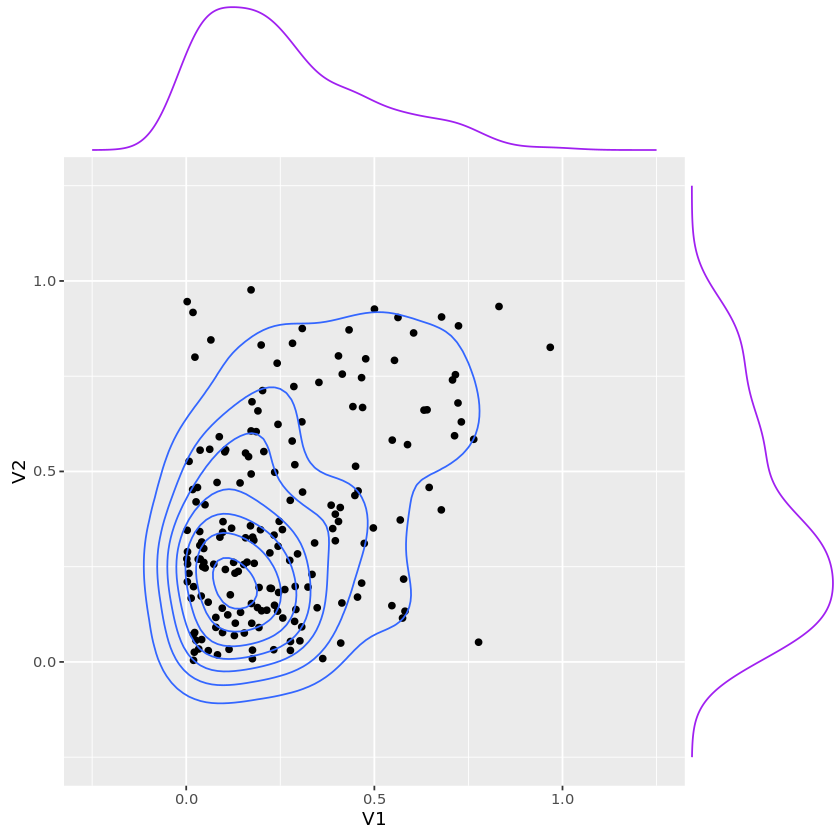

In [4]:
brain_only_variants<-variant_list[variant_list$Brain_only==1,]$variant_list
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only,  Cell_Type=='DLX1' & Organ=='CTX' & Hemisphere %in% c('R') )
Post <- subset(filtered_brain_only,  Cell_Type=='TBR1' & Organ=='CTX' & Hemisphere %in% c('R'))
Dor <- subset(filtered_brain_only,  Cell_Type=='DLX1' & Organ=='CTX' & Hemisphere %in% c('R'))
Ven <- subset(filtered_brain_only,  Cell_Type=='COUPTF2' & Organ=='CTX' & Hemisphere %in% c('R'))

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

In [5]:
rownames(delta) <- brain_only_variants
delta2<-subset(delta, V2>0.5 & V1<0.5)

In [6]:
rownames(delta2)

[1] "1-45675887-A-C"      "1-98426749-G-A"      "2-1519264-AAC-A"    
 [4] "2-8566334-G-T"       "2-97358394-C-T"      "2-99501908-C-T"     
 [7] "2-189956910-G-A"     "3-84719043-C-T"      "3-96090255-C-T"     
[10] "4-71105167-A-T"      "4-93868224-A-C"      "5-85460580-G-T"     
[13] "5-160411647-T-G"     "6-7569605-G-A"       "6-55394736-C-T"     
[16] "6-122610884-C-T"     "6-131367555-G-A"     "7-131427177-ATTTC-A"
[19] "7-150175576-A-C"     "8-72947366-G-A"      "9-1722340-A-G"      
[22] "10-116196503-C-T"    "10-133022785-C-T"    "11-84980734-G-A"    
[25] "11-94048896-G-A"     "13-47430361-C-T"     "13-113887705-CCAG-C"
[28] "14-44933484-T-C"     "14-48579727-C-T"     "14-65962309-A-C"    
[31] "14-78677839-C-T"     "16-69679204-G-C"     "18-6258630-G-A"     
[34] "22-46947808-G-A"     "X-54739596-C-G"      "X-117352547-A-T"    
[37] "X-141942973-G-A"

In [7]:
variant_list$COUPTF2_enriched[variant_list$variant_list %in% rownames(delta2)]<-1
variant_list$COUPTF2_enriched[!variant_list$variant_list %in% rownames(delta2)]<-0

In [8]:
print(paste("PF present variants: ",nrow(variant_list[variant_list$PF==1,])))
print(paste("F present variants: ",nrow(variant_list[variant_list$F==1,])))
print(paste("P present variants: ",nrow(variant_list[variant_list$P==1,])))
print(paste("O present variants: ",nrow(variant_list[variant_list$O==1,])))
print(paste("Ins present variants: ",nrow(variant_list[variant_list$Ins==1,])))
print(paste("T present variants: ",nrow(variant_list[variant_list$T==1,])))
print(paste("Brain only variants: ",nrow(variant_list[variant_list$Brain_only==1,])))
print(paste("CTX_BG only variants: ",nrow(variant_list[variant_list$CTX_BG_only==1,])))
print(paste("CTX only variants: ",nrow(variant_list[variant_list$CTX_only==1,])))
print(paste("BG only variants: ",nrow(variant_list[variant_list$BG_only==1,])))
print(paste("THAL only variants: ",nrow(variant_list[variant_list$THAL_only==1,])))
print(paste("Left only variants: ",nrow(variant_list[variant_list$Left_only==1,])))
print(paste("Right only variants: ",nrow(variant_list[variant_list$Right_only==1,])))
print(paste("IN only variants: ",nrow(variant_list[variant_list$IN_only==1,])))
print(paste("COUP only variants: ",nrow(variant_list[variant_list$COUP_only==1,])))
print(paste("TBR only variants: ",nrow(variant_list[variant_list$TBR_only==1,])))
print(paste("TBR BR variants: ",nrow(variant_list[variant_list$TBR_BR==1,])))
print(paste("DLX BR variants: ",nrow(variant_list[variant_list$DLX_BR==1,])))
print(paste("COUPTF2_enriched variants: ",nrow(variant_list[variant_list$COUPTF2_enriched==1,])))

[1] "PF present variants:  136"
[1] "F present variants:  139"
[1] "P present variants:  132"
[1] "O present variants:  136"
[1] "Ins present variants:  114"
[1] "T present variants:  135"
[1] "Brain only variants:  179"
[1] "CTX_BG only variants:  71"
[1] "CTX only variants:  31"
[1] "BG only variants:  2"
[1] "THAL only variants:  3"
[1] "Left only variants:  36"
[1] "Right only variants:  31"
[1] "IN only variants:  27"
[1] "COUP only variants:  21"
[1] "TBR only variants:  1"
[1] "TBR BR variants:  130"
[1] "DLX BR variants:  149"
[1] "COUPTF2_enriched variants:  37"


In [9]:
colnames(variant_list)

[1] "variant_list"            "sample_number_presented"
 [3] "CTX"                     "CB"                     
 [5] "Heart"                   "Kidney"                 
 [7] "BG"                      "THAL"                   
 [9] "Liver"                   "L"                      
[11] "R"                       "PF"                     
[13] "F"                       "P"                      
[15] "O"                       "T"                      
[17] "Ins"                     "Cau"                    
[19] "Put"                     "GP"                     
[21] "Bulk"                    "DLX1"                   
[23] "TBR1"                    "COUPTF2"                
[25] "NeuN"                    "LHX2"                   
[27] "Olig2"                   "PU1"                    
[29] "DARPP32M-NeuNP"          "DARPP32P-NeuNP"         
[31] "Cardiomyocyte"           "Brain_only"             
[33] "CTX_only"                "CTX_BG_only"            
[35] "BG_only"                 "THAL_only"              
[37] "Left_only"               "Right_only"             
[39] "L_BR_PF_only"            "L_BR_F_only"            
[41] "L_BR_P_only"             "L_BR_O_only"            
[43] "L_BR_Ins_only"           "R_BR_PF_only"           
[45] "R_BR_F_only"             "R_BR_P_only"            
[47] "R_BR_O_only"             "R_BR_Ins_only"          
[49] "IN_only"                 "COUP_only"              
[51] "TBR_only"                "TBR_BR"                 
[53] "DLX_BR"                  "COUP_BR"                
[55] "MSN_BR"                  "nonMSN_BR"              
[57] "COUPTF2_enriched"

In [10]:
variant_list2 <- variant_list[,-1]
colnames(variant_list2)<- paste0(colnames(variant_list2), "_sort")
variant_list_bulk <- read.csv("../variant_annotation/287_variant_annotation_bulk.csv",header=T,sep=",", row.names = 1)
variant_list2<-cbind(variant_list_bulk,variant_list2)

In [11]:
write.csv(variant_list2,"./287_variant_annotation_bulk_sort.csv")

# COUPTF2

In [12]:
library(ggplot2)
library(dplyr)
library(gplots)
library(reshape2)
library(umap)
library(ggExtra) 
library(pals)
library(RColorBrewer)

filtered <- read.table("../7614_final_summary_anno3.txt",header=T,sep="\t")

names(filtered)

unique(filtered$Hemisphere)
unique(filtered$Region)
unique(filtered$Punch)
unique(filtered$Cell_Type)
unique(filtered$Location)
unique(filtered$AntPost)
unique(filtered$DorVen)
unique(filtered$Organ)
unique(filtered$Note)

print(paste("A total of variant calls: ",nrow(filtered)))
print(paste("The number of variants included in ampliseq: ", length(unique(filtered$CHROM.POS.REF.ALT))))

filtered2 <- subset(filtered, Sort_main %in% c('1')) %>% subset(Cell_Type %in% c('COUPTF2')) # restrict annotation of variants based on the only selected sorted sample information
filtered2$Punch<-as.character(filtered2$Punch)
filtered2$Note<-as.character(filtered2$Note)

mosaic_filtered <- filtered2[filtered2$Mosaic_shared_btw_WGS_Amp==1,]
mosaic_filtered_cutoff <- subset(mosaic_filtered, LOWER_CI>0.001677998 & UPPER_CI<0.3923302 & NORMAL_LOWER_CI<0.001677998)

print(paste("The number of validated MVs: ", length(unique(mosaic_filtered$CHROM.POS.REF.ALT))))
print(paste("The number of validated MV calls: ", length(mosaic_filtered_cutoff$CHROM.POS.REF.ALT)))

# statistics

variant_list<-unique(mosaic_filtered$CHROM.POS.REF.ALT)
variant_list<-as.data.frame(variant_list, row.names = variant_list) # assign rownames as CHROM.POS.REF.ALT
print(paste("The number of validated MVs (in the variant_list variable): ", nrow(variant_list)))
for (i in 1:nrow(variant_list)){
    xx <- filtered2[filtered2$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
    xx <- subset(xx, LOWER_CI>0.001677998 & UPPER_CI<0.3923302 & NORMAL_LOWER_CI<0.001677998 )
    n_row <- nrow(xx)
    variant_list$sample_number_presented[i] <- n_row
    }
print(paste("The number of validated MVs and detected in this 2023 Ampliseq: ", nrow(variant_list[variant_list$sample_number_presented>0,])))
# Non-private Mosaic variants
print(paste("The number of shared validated MVs : ",nrow(variant_list[variant_list$sample_number_presented>1,])))

[1] "ID"                        "CHROM"                    
 [3] "POS"                       "REF"                      
 [5] "ALT"                       "CHROM.POS.REF.ALT"        
 [7] "ANNO"                      "GENE"                     
 [9] "GNOMAD_FREQ"               "REPEAT_MASKER"            
[11] "SEGDUP"                    "HOMOPOLYMER"              
[13] "REF_SEQ"                   "DINUCLEOTIDE"             
[15] "NEAR_INDEL"                "UCSC_RPMSK"               
[17] "REF_COUNT"                 "ALT_COUNT"                
[19] "MAF"                       "LOWER_CI"                 
[21] "UPPER_CI"                  "CI_IS_GREATER"            
[23] "NORMAL_REF_COUNT"          "NORMAL_ALT_COUNT"         
[25] "NORMAL_MAF"                "NORMAL_LOWER_CI"          
[27] "NORMAL_UPPER_CI"           "NORMAL_CI_IS_GREATER"     
[29] "Mosaic"                    "Mosaic_shared_btw_WGS_Amp"
[31] "Hemisphere"                "Region"                   
[33] "Punch"                     "Cell_Type"                
[35] "Location"                  "AntPost"                  
[37] "DorVen"                    "Organ"                    
[39] "Note"                      "Bulk_main"                
[41] "Sort_main"                 "CTX_BG_HIP_relationship"

[1] "L" NA  "R"

[1] "T"    "Cb"   NA     "Cau"  "Amg"  "GP"   "Put"  "Hip"  "Thal" "CA1" 
[11] "CA3"  "DG"   "Sub"  "Ins"  "F"    "O"    "P"    "PF"   "Clo"

[1]  NA 141   2   3   1   4   5   6  10   7   8   9 144 145  34  35  36  37  72
[20]  73  74  75  29  57  43  15  99 127 113  85  71

[1] "Bulk"           "Cardiomyocyte"  "COUPTF2"        "DLX1"          
 [5] "DARPP32M-NeuNP" "DARPP32P-NeuNP" "TBR1"           "NeuN"          
 [9] "LHX2"           "Olig2"          "PU1"

[1] NA  "C" "P" "V" "A" "D"

[1] "Post" NA     "Ant"

[1] "Ven" NA    "Dor"

[1] "CTX"    "CB"     "Heart"  "Kidney" "BG"     "AMG"    "HIP"    "THAL"  
 [9] "SUB"    "Liver"  "CLO"    "JGG"

[1] "LARGE" "SMALL" NA

[1] "A total of variant calls:  335124"
[1] "The number of variants included in ampliseq:  1044"
[1] "The number of validated MVs:  287"
[1] "The number of validated MV calls:  987"
[1] "The number of validated MVs (in the variant_list variable):  287"
[1] "The number of validated MVs and detected in this 2023 Ampliseq:  136"
[1] "The number of shared validated MVs :  116"


In [13]:
for (j in c('CTX','CB','Heart','Kidney','BG','THAL','Liver')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Organ)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('L','R')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Hemisphere)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('PF','F','P','O','T','Ins')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Region)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('Cau','Put','GP')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Region)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('Bulk','DLX1','TBR1','COUPTF2','Bulk','NeuN','LHX2','Olig2','PU1','DARPP32M-NeuNP','DARPP32P-NeuNP','Cardiomyocyte')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Cell_Type)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

In [14]:

Brain_only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0) & (CTX==1 | CB==1 | BG==1 |  THAL==1))
variant_list$Brain_only[variant_list$variant_list %in% rownames(Brain_only_variants)]<-1
variant_list$Brain_only[!variant_list$variant_list %in% rownames(Brain_only_variants)]<-0

CTX_only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & BG==0 & THAL==0) & (CTX==1))
variant_list$CTX_only[variant_list$variant_list %in% rownames(CTX_only_variants)]<-1
variant_list$CTX_only[!variant_list$variant_list %in% rownames(CTX_only_variants)]<-0

only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & THAL==0) & (CTX==1 | BG==1))
variant_list$CTX_BG_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$CTX_BG_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & THAL==0 & CTX==0) & (BG==1))
variant_list$BG_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$BG_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & BG==0 & CTX==0) & (THAL==1))
variant_list$THAL_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$THAL_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

#--------------------------------hemisphere only----------------------------------------
only_variants<-subset(variant_list, (L==1) & (R==0) & (Brain_only==1))
variant_list$Left_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$Left_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (R==1) & (L==0) & (Brain_only==1))
variant_list$Right_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$Right_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

#--------------------------------lobe only----------------------------------------
only_variants<-subset(variant_list, (PF==1) & (F==0) & (P==0) & (O==0) & (Ins==0) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_PF_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_PF_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==1) & (P==0) & (O==0) & (Ins==0) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_F_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_F_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==1) & (O==0) & (Ins==0) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_P_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_P_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==0) & (O==1) & (Ins==0) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_O_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_O_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==0) & (O==0) & (Ins==1) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_Ins_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_Ins_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==1) & (F==0) & (P==0) & (O==0) & (Ins==0) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_PF_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_PF_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==1) & (P==0) & (O==0) & (Ins==0) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_F_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_F_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==1) & (O==0) & (Ins==0) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_P_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_P_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==0) & (O==1) & (Ins==0) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_O_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_O_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==0) & (O==0) & (Ins==1) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_Ins_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_Ins_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

#----------------------------------------------------------------------------------------------------------------------

only_variants<-subset(variant_list, (TBR1==0) & (DLX1==1 | COUPTF2==1) & (Brain_only==1))
variant_list$IN_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$IN_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (TBR1==0) & (COUPTF2==1) & (Brain_only==1))
variant_list$COUP_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$COUP_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (DLX1==0 & COUPTF2==0) & (TBR1==1) & (Brain_only==1))
variant_list$TBR_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$TBR_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (TBR1==1) & (Brain_only==1))
variant_list$TBR_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$TBR_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (DLX1==1) & (Brain_only==1))
variant_list$DLX_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$DLX_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (COUPTF2==1) & (Brain_only==1))
variant_list$COUP_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$COUP_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, ('DARPP32P-NeuNP'==1) & (Brain_only==1))
variant_list$MSN_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$MSN_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, ('DARPP32M-NeuNP'==1) & (Brain_only==1))
variant_list$nonMSN_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$nonMSN_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

names(variant_list)

[1] "variant_list"            "sample_number_presented"
 [3] "CTX"                     "CB"                     
 [5] "Heart"                   "Kidney"                 
 [7] "BG"                      "THAL"                   
 [9] "Liver"                   "L"                      
[11] "R"                       "PF"                     
[13] "F"                       "P"                      
[15] "O"                       "T"                      
[17] "Ins"                     "Cau"                    
[19] "Put"                     "GP"                     
[21] "Bulk"                    "DLX1"                   
[23] "TBR1"                    "COUPTF2"                
[25] "NeuN"                    "LHX2"                   
[27] "Olig2"                   "PU1"                    
[29] "DARPP32M-NeuNP"          "DARPP32P-NeuNP"         
[31] "Cardiomyocyte"           "Brain_only"             
[33] "CTX_only"                "CTX_BG_only"            
[35] "BG_only"                 "THAL_only"              
[37] "Left_only"               "Right_only"             
[39] "L_BR_PF_only"            "L_BR_F_only"            
[41] "L_BR_P_only"             "L_BR_O_only"            
[43] "L_BR_Ins_only"           "R_BR_PF_only"           
[45] "R_BR_F_only"             "R_BR_P_only"            
[47] "R_BR_O_only"             "R_BR_Ins_only"          
[49] "IN_only"                 "COUP_only"              
[51] "TBR_only"                "TBR_BR"                 
[53] "DLX_BR"                  "COUP_BR"                
[55] "MSN_BR"                  "nonMSN_BR"

[1] 0.01020439

[1] 0.00985167

[1] 0.01020439

[1] 0.009867718

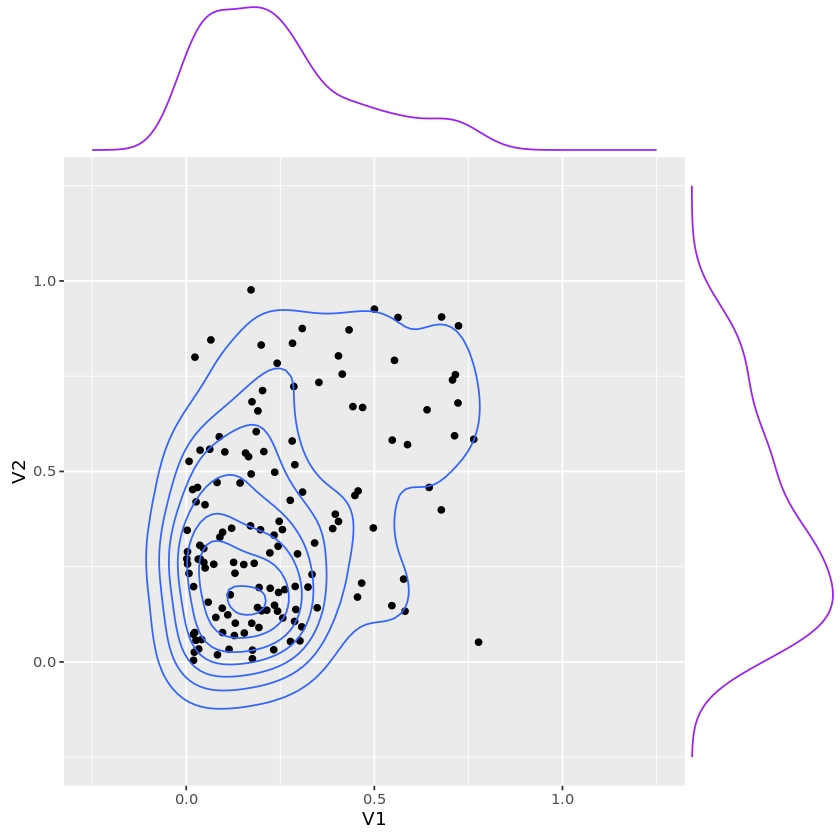

In [15]:
brain_only_variants<-variant_list[variant_list$Brain_only==1,]$variant_list
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only,  Cell_Type=='DLX1' & Organ=='CTX' & Hemisphere %in% c('R') )
Post <- subset(filtered_brain_only,  Cell_Type=='TBR1' & Organ=='CTX' & Hemisphere %in% c('R'))
Dor <- subset(filtered_brain_only,  Cell_Type=='DLX1' & Organ=='CTX' & Hemisphere %in% c('R'))
Ven <- subset(filtered_brain_only,  Cell_Type=='COUPTF2' & Organ=='CTX' & Hemisphere %in% c('R'))

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

In [16]:
rownames(delta) <- brain_only_variants
delta2<-subset(delta, V2>0.5 & V1<0.5)

In [17]:
rownames(delta2)

[1] "1-45675887-A-C"      "2-1519264-AAC-A"     "2-8566334-G-T"      
 [4] "2-97358394-C-T"      "2-189956910-G-A"     "3-84719043-C-T"     
 [7] "3-96090255-C-T"      "4-93868224-A-C"      "5-85460580-G-T"     
[10] "5-160411647-T-G"     "6-7569605-G-A"       "6-55394736-C-T"     
[13] "6-122610884-C-T"     "6-131367555-G-A"     "7-131427177-ATTTC-A"
[16] "9-1722340-A-G"       "10-116196503-C-T"    "10-133022785-C-T"   
[19] "11-84980734-G-A"     "13-47430361-C-T"     "14-44933484-T-C"    
[22] "14-48579727-C-T"     "14-78677839-C-T"     "18-6258630-G-A"     
[25] "22-46947808-G-A"     "X-54739596-C-G"      "X-117352547-A-T"    
[28] "X-141942973-G-A"

In [18]:
variant_list$COUPTF2_enriched[variant_list$variant_list %in% rownames(delta2)]<-1
variant_list$COUPTF2_enriched[!variant_list$variant_list %in% rownames(delta2)]<-0

In [19]:
print(paste("PF present variants: ",nrow(variant_list[variant_list$PF==1,])))
print(paste("F present variants: ",nrow(variant_list[variant_list$F==1,])))
print(paste("P present variants: ",nrow(variant_list[variant_list$P==1,])))
print(paste("O present variants: ",nrow(variant_list[variant_list$O==1,])))
print(paste("Ins present variants: ",nrow(variant_list[variant_list$Ins==1,])))
print(paste("T present variants: ",nrow(variant_list[variant_list$T==1,])))
print(paste("Brain only variants: ",nrow(variant_list[variant_list$Brain_only==1,])))
print(paste("CTX_BG only variants: ",nrow(variant_list[variant_list$CTX_BG_only==1,])))
print(paste("CTX only variants: ",nrow(variant_list[variant_list$CTX_only==1,])))
print(paste("BG only variants: ",nrow(variant_list[variant_list$BG_only==1,])))
print(paste("THAL only variants: ",nrow(variant_list[variant_list$THAL_only==1,])))
print(paste("Left only variants: ",nrow(variant_list[variant_list$Left_only==1,])))
print(paste("Right only variants: ",nrow(variant_list[variant_list$Right_only==1,])))
print(paste("IN only variants: ",nrow(variant_list[variant_list$IN_only==1,])))
print(paste("COUP only variants: ",nrow(variant_list[variant_list$COUP_only==1,])))
print(paste("TBR only variants: ",nrow(variant_list[variant_list$TBR_only==1,])))
print(paste("TBR BR variants: ",nrow(variant_list[variant_list$TBR_BR==1,])))
print(paste("DLX BR variants: ",nrow(variant_list[variant_list$DLX_BR==1,])))
print(paste("COUPTF2_enriched variants: ",nrow(variant_list[variant_list$COUPTF2_enriched==1,])))

[1] "PF present variants:  80"
[1] "F present variants:  84"
[1] "P present variants:  75"
[1] "O present variants:  83"
[1] "Ins present variants:  83"
[1] "T present variants:  87"
[1] "Brain only variants:  136"
[1] "CTX_BG only variants:  62"
[1] "CTX only variants:  30"
[1] "BG only variants:  9"
[1] "THAL only variants:  7"
[1] "Left only variants:  40"
[1] "Right only variants:  27"
[1] "IN only variants:  136"
[1] "COUP only variants:  136"
[1] "TBR only variants:  0"
[1] "TBR BR variants:  0"
[1] "DLX BR variants:  0"
[1] "COUPTF2_enriched variants:  28"


In [20]:
colnames(variant_list)

[1] "variant_list"            "sample_number_presented"
 [3] "CTX"                     "CB"                     
 [5] "Heart"                   "Kidney"                 
 [7] "BG"                      "THAL"                   
 [9] "Liver"                   "L"                      
[11] "R"                       "PF"                     
[13] "F"                       "P"                      
[15] "O"                       "T"                      
[17] "Ins"                     "Cau"                    
[19] "Put"                     "GP"                     
[21] "Bulk"                    "DLX1"                   
[23] "TBR1"                    "COUPTF2"                
[25] "NeuN"                    "LHX2"                   
[27] "Olig2"                   "PU1"                    
[29] "DARPP32M-NeuNP"          "DARPP32P-NeuNP"         
[31] "Cardiomyocyte"           "Brain_only"             
[33] "CTX_only"                "CTX_BG_only"            
[35] "BG_only"                 "THAL_only"              
[37] "Left_only"               "Right_only"             
[39] "L_BR_PF_only"            "L_BR_F_only"            
[41] "L_BR_P_only"             "L_BR_O_only"            
[43] "L_BR_Ins_only"           "R_BR_PF_only"           
[45] "R_BR_F_only"             "R_BR_P_only"            
[47] "R_BR_O_only"             "R_BR_Ins_only"          
[49] "IN_only"                 "COUP_only"              
[51] "TBR_only"                "TBR_BR"                 
[53] "DLX_BR"                  "COUP_BR"                
[55] "MSN_BR"                  "nonMSN_BR"              
[57] "COUPTF2_enriched"

In [21]:
variant_list2 <- variant_list[,-1]
colnames(variant_list2)<- paste0(colnames(variant_list2), "_COUPTF2")
variant_list_bulk <- read.csv("../variant_annotation/287_variant_annotation_bulk_sort.csv",header=T,sep=",", row.names = 1)
variant_list2<-cbind(variant_list_bulk,variant_list2)


In [22]:
write.csv(variant_list2,"./287_variant_annotation_bulk_sort_COUPTF2.csv")

# variant annotation with only TBR1 sample

In [23]:
library(ggplot2)
library(dplyr)
library(gplots)
library(reshape2)
library(umap)
library(ggExtra) 
library(pals)
library(RColorBrewer)

filtered <- read.table("../7614_final_summary_anno3.txt",header=T,sep="\t")

names(filtered)

unique(filtered$Hemisphere)
unique(filtered$Region)
unique(filtered$Punch)
unique(filtered$Cell_Type)
unique(filtered$Location)
unique(filtered$AntPost)
unique(filtered$DorVen)
unique(filtered$Organ)
unique(filtered$Note)

print(paste("A total of variant calls: ",nrow(filtered)))
print(paste("The number of variants included in ampliseq: ", length(unique(filtered$CHROM.POS.REF.ALT))))

filtered2 <- subset(filtered, Sort_main %in% c('1')) %>% subset(Cell_Type %in% c('TBR1')) # restrict annotation of variants based on the only selected sorted sample information
filtered2$Punch<-as.character(filtered2$Punch)
filtered2$Note<-as.character(filtered2$Note)

mosaic_filtered <- filtered2[filtered2$Mosaic_shared_btw_WGS_Amp==1,]
mosaic_filtered_cutoff <- subset(mosaic_filtered, LOWER_CI>0.001677998 & UPPER_CI<0.3923302 & NORMAL_LOWER_CI<0.001677998)

print(paste("The number of validated MVs: ", length(unique(mosaic_filtered$CHROM.POS.REF.ALT))))
print(paste("The number of validated MV calls: ", length(mosaic_filtered_cutoff$CHROM.POS.REF.ALT)))

# statistics

variant_list<-unique(mosaic_filtered$CHROM.POS.REF.ALT)
variant_list<-as.data.frame(variant_list, row.names = variant_list) # assign rownames as CHROM.POS.REF.ALT
print(paste("The number of validated MVs (in the variant_list variable): ", nrow(variant_list)))
for (i in 1:nrow(variant_list)){
    xx <- filtered2[filtered2$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
    xx <- subset(xx, LOWER_CI>0.001677998 & UPPER_CI<0.3923302 & NORMAL_LOWER_CI<0.001677998 )
    n_row <- nrow(xx)
    variant_list$sample_number_presented[i] <- n_row
    }
print(paste("The number of validated MVs and detected in this 2023 Ampliseq: ", nrow(variant_list[variant_list$sample_number_presented>0,])))
# Non-private Mosaic variants
print(paste("The number of shared validated MVs : ",nrow(variant_list[variant_list$sample_number_presented>1,])))

[1] "ID"                        "CHROM"                    
 [3] "POS"                       "REF"                      
 [5] "ALT"                       "CHROM.POS.REF.ALT"        
 [7] "ANNO"                      "GENE"                     
 [9] "GNOMAD_FREQ"               "REPEAT_MASKER"            
[11] "SEGDUP"                    "HOMOPOLYMER"              
[13] "REF_SEQ"                   "DINUCLEOTIDE"             
[15] "NEAR_INDEL"                "UCSC_RPMSK"               
[17] "REF_COUNT"                 "ALT_COUNT"                
[19] "MAF"                       "LOWER_CI"                 
[21] "UPPER_CI"                  "CI_IS_GREATER"            
[23] "NORMAL_REF_COUNT"          "NORMAL_ALT_COUNT"         
[25] "NORMAL_MAF"                "NORMAL_LOWER_CI"          
[27] "NORMAL_UPPER_CI"           "NORMAL_CI_IS_GREATER"     
[29] "Mosaic"                    "Mosaic_shared_btw_WGS_Amp"
[31] "Hemisphere"                "Region"                   
[33] "Punch"                     "Cell_Type"                
[35] "Location"                  "AntPost"                  
[37] "DorVen"                    "Organ"                    
[39] "Note"                      "Bulk_main"                
[41] "Sort_main"                 "CTX_BG_HIP_relationship"

[1] "L" NA  "R"

[1] "T"    "Cb"   NA     "Cau"  "Amg"  "GP"   "Put"  "Hip"  "Thal" "CA1" 
[11] "CA3"  "DG"   "Sub"  "Ins"  "F"    "O"    "P"    "PF"   "Clo"

[1]  NA 141   2   3   1   4   5   6  10   7   8   9 144 145  34  35  36  37  72
[20]  73  74  75  29  57  43  15  99 127 113  85  71

[1] "Bulk"           "Cardiomyocyte"  "COUPTF2"        "DLX1"          
 [5] "DARPP32M-NeuNP" "DARPP32P-NeuNP" "TBR1"           "NeuN"          
 [9] "LHX2"           "Olig2"          "PU1"

[1] NA  "C" "P" "V" "A" "D"

[1] "Post" NA     "Ant"

[1] "Ven" NA    "Dor"

[1] "CTX"    "CB"     "Heart"  "Kidney" "BG"     "AMG"    "HIP"    "THAL"  
 [9] "SUB"    "Liver"  "CLO"    "JGG"

[1] "LARGE" "SMALL" NA

[1] "A total of variant calls:  335124"
[1] "The number of variants included in ampliseq:  1044"
[1] "The number of validated MVs:  287"
[1] "The number of validated MV calls:  720"
[1] "The number of validated MVs (in the variant_list variable):  287"
[1] "The number of validated MVs and detected in this 2023 Ampliseq:  130"
[1] "The number of shared validated MVs :  115"


In [24]:
for (j in c('CTX','CB','Heart','Kidney','BG','THAL','Liver')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Organ)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('L','R')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Hemisphere)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('PF','F','P','O','T','Ins')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Region)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('Cau','Put','GP')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Region)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('Bulk','DLX1','TBR1','COUPTF2','Bulk','NeuN','LHX2','Olig2','PU1','DARPP32M-NeuNP','DARPP32P-NeuNP','Cardiomyocyte')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Cell_Type)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

In [25]:

Brain_only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0) & (CTX==1 | CB==1 | BG==1 |  THAL==1))
variant_list$Brain_only[variant_list$variant_list %in% rownames(Brain_only_variants)]<-1
variant_list$Brain_only[!variant_list$variant_list %in% rownames(Brain_only_variants)]<-0

CTX_only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & BG==0 & THAL==0) & (CTX==1))
variant_list$CTX_only[variant_list$variant_list %in% rownames(CTX_only_variants)]<-1
variant_list$CTX_only[!variant_list$variant_list %in% rownames(CTX_only_variants)]<-0

only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & THAL==0) & (CTX==1 | BG==1))
variant_list$CTX_BG_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$CTX_BG_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & THAL==0 & CTX==0) & (BG==1))
variant_list$BG_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$BG_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & BG==0 & CTX==0) & (THAL==1))
variant_list$THAL_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$THAL_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

#--------------------------------hemisphere only----------------------------------------
only_variants<-subset(variant_list, (L==1) & (R==0) & (Brain_only==1))
variant_list$Left_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$Left_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (R==1) & (L==0) & (Brain_only==1))
variant_list$Right_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$Right_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

#--------------------------------lobe only----------------------------------------
only_variants<-subset(variant_list, (PF==1) & (F==0) & (P==0) & (O==0) & (Ins==0) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_PF_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_PF_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==1) & (P==0) & (O==0) & (Ins==0) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_F_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_F_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==1) & (O==0) & (Ins==0) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_P_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_P_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==0) & (O==1) & (Ins==0) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_O_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_O_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==0) & (O==0) & (Ins==1) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_Ins_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_Ins_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==1) & (F==0) & (P==0) & (O==0) & (Ins==0) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_PF_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_PF_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==1) & (P==0) & (O==0) & (Ins==0) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_F_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_F_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==1) & (O==0) & (Ins==0) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_P_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_P_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==0) & (O==1) & (Ins==0) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_O_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_O_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==0) & (O==0) & (Ins==1) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_Ins_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_Ins_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

#----------------------------------------------------------------------------------------------------------------------

only_variants<-subset(variant_list, (TBR1==0) & (DLX1==1 | COUPTF2==1) & (Brain_only==1))
variant_list$IN_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$IN_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (TBR1==0) & (COUPTF2==1) & (Brain_only==1))
variant_list$COUP_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$COUP_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (DLX1==0 & COUPTF2==0) & (TBR1==1) & (Brain_only==1))
variant_list$TBR_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$TBR_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (TBR1==1) & (Brain_only==1))
variant_list$TBR_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$TBR_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (DLX1==1) & (Brain_only==1))
variant_list$DLX_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$DLX_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (COUPTF2==1) & (Brain_only==1))
variant_list$COUP_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$COUP_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, ('DARPP32P-NeuNP'==1) & (Brain_only==1))
variant_list$MSN_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$MSN_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, ('DARPP32M-NeuNP'==1) & (Brain_only==1))
variant_list$nonMSN_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$nonMSN_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

names(variant_list)

[1] "variant_list"            "sample_number_presented"
 [3] "CTX"                     "CB"                     
 [5] "Heart"                   "Kidney"                 
 [7] "BG"                      "THAL"                   
 [9] "Liver"                   "L"                      
[11] "R"                       "PF"                     
[13] "F"                       "P"                      
[15] "O"                       "T"                      
[17] "Ins"                     "Cau"                    
[19] "Put"                     "GP"                     
[21] "Bulk"                    "DLX1"                   
[23] "TBR1"                    "COUPTF2"                
[25] "NeuN"                    "LHX2"                   
[27] "Olig2"                   "PU1"                    
[29] "DARPP32M-NeuNP"          "DARPP32P-NeuNP"         
[31] "Cardiomyocyte"           "Brain_only"             
[33] "CTX_only"                "CTX_BG_only"            
[35] "BG_only"                 "THAL_only"              
[37] "Left_only"               "Right_only"             
[39] "L_BR_PF_only"            "L_BR_F_only"            
[41] "L_BR_P_only"             "L_BR_O_only"            
[43] "L_BR_Ins_only"           "R_BR_PF_only"           
[45] "R_BR_F_only"             "R_BR_P_only"            
[47] "R_BR_O_only"             "R_BR_Ins_only"          
[49] "IN_only"                 "COUP_only"              
[51] "TBR_only"                "TBR_BR"                 
[53] "DLX_BR"                  "COUP_BR"                
[55] "MSN_BR"                  "nonMSN_BR"

In [26]:
print(paste("PF present variants: ",nrow(variant_list[variant_list$Heart==1,])))
print(paste("PF present variants: ",nrow(variant_list[variant_list$PF==1,])))
print(paste("F present variants: ",nrow(variant_list[variant_list$F==1,])))
print(paste("P present variants: ",nrow(variant_list[variant_list$P==1,])))
print(paste("O present variants: ",nrow(variant_list[variant_list$O==1,])))
print(paste("Ins present variants: ",nrow(variant_list[variant_list$Ins==1,])))
print(paste("T present variants: ",nrow(variant_list[variant_list$T==1,])))
print(paste("Brain only variants: ",nrow(variant_list[variant_list$Brain_only==1,])))
print(paste("CTX_BG only variants: ",nrow(variant_list[variant_list$CTX_BG_only==1,])))
print(paste("CTX only variants: ",nrow(variant_list[variant_list$CTX_only==1,])))
print(paste("BG only variants: ",nrow(variant_list[variant_list$BG_only==1,])))
print(paste("THAL only variants: ",nrow(variant_list[variant_list$THAL_only==1,])))
print(paste("Left only variants: ",nrow(variant_list[variant_list$Left_only==1,])))
print(paste("Right only variants: ",nrow(variant_list[variant_list$Right_only==1,])))
print(paste("IN only variants: ",nrow(variant_list[variant_list$IN_only==1,])))
print(paste("COUP only variants: ",nrow(variant_list[variant_list$COUP_only==1,])))
print(paste("TBR only variants: ",nrow(variant_list[variant_list$TBR_only==1,])))
print(paste("TBR BR variants: ",nrow(variant_list[variant_list$TBR_BR==1,])))
print(paste("DLX BR variants: ",nrow(variant_list[variant_list$DLX_BR==1,])))
print(paste("COUPTF2_enriched variants: ",nrow(variant_list[variant_list$COUPTF2_enriched==1,])))

[1] "PF present variants:  0"
[1] "PF present variants:  91"
[1] "F present variants:  90"
[1] "P present variants:  92"
[1] "O present variants:  91"
[1] "Ins present variants:  81"
[1] "T present variants:  94"
[1] "Brain only variants:  130"
[1] "CTX_BG only variants:  130"
[1] "CTX only variants:  130"
[1] "BG only variants:  0"
[1] "THAL only variants:  0"
[1] "Left only variants:  40"
[1] "Right only variants:  24"
[1] "IN only variants:  0"
[1] "COUP only variants:  0"
[1] "TBR only variants:  130"
[1] "TBR BR variants:  130"
[1] "DLX BR variants:  0"
[1] "COUPTF2_enriched variants:  0"


In [27]:
colnames(variant_list)

[1] "variant_list"            "sample_number_presented"
 [3] "CTX"                     "CB"                     
 [5] "Heart"                   "Kidney"                 
 [7] "BG"                      "THAL"                   
 [9] "Liver"                   "L"                      
[11] "R"                       "PF"                     
[13] "F"                       "P"                      
[15] "O"                       "T"                      
[17] "Ins"                     "Cau"                    
[19] "Put"                     "GP"                     
[21] "Bulk"                    "DLX1"                   
[23] "TBR1"                    "COUPTF2"                
[25] "NeuN"                    "LHX2"                   
[27] "Olig2"                   "PU1"                    
[29] "DARPP32M-NeuNP"          "DARPP32P-NeuNP"         
[31] "Cardiomyocyte"           "Brain_only"             
[33] "CTX_only"                "CTX_BG_only"            
[35] "BG_only"                 "THAL_only"              
[37] "Left_only"               "Right_only"             
[39] "L_BR_PF_only"            "L_BR_F_only"            
[41] "L_BR_P_only"             "L_BR_O_only"            
[43] "L_BR_Ins_only"           "R_BR_PF_only"           
[45] "R_BR_F_only"             "R_BR_P_only"            
[47] "R_BR_O_only"             "R_BR_Ins_only"          
[49] "IN_only"                 "COUP_only"              
[51] "TBR_only"                "TBR_BR"                 
[53] "DLX_BR"                  "COUP_BR"                
[55] "MSN_BR"                  "nonMSN_BR"

In [28]:
variant_list2 <- variant_list[,-1]
colnames(variant_list2)<- paste0(colnames(variant_list2), "_TBR1")
variant_list_bulk <- read.csv("../variant_annotation/287_variant_annotation_bulk_sort_COUPTF2.csv",header=T,sep=",", row.names = 1)
variant_list2<-cbind(variant_list_bulk,variant_list2)


In [29]:
write.csv(variant_list2,"./287_variant_annotation_bulk_sort_COUPTF2_TBR1.csv")

# variant annotation with only DLX1 samples

In [30]:
library(ggplot2)
library(dplyr)
library(gplots)
library(reshape2)
library(umap)
library(ggExtra) 
library(pals)
library(RColorBrewer)

filtered <- read.table("../7614_final_summary_anno3.txt",header=T,sep="\t")

names(filtered)

unique(filtered$Hemisphere)
unique(filtered$Region)
unique(filtered$Punch)
unique(filtered$Cell_Type)
unique(filtered$Location)
unique(filtered$AntPost)
unique(filtered$DorVen)
unique(filtered$Organ)
unique(filtered$Note)

print(paste("A total of variant calls: ",nrow(filtered)))
print(paste("The number of variants included in ampliseq: ", length(unique(filtered$CHROM.POS.REF.ALT))))

filtered2 <- subset(filtered, Sort_main %in% c('1')) %>% subset(Cell_Type %in% c('COUPTF2')) # restrict annotation of variants based on the only selected sorted sample information
filtered2$Punch<-as.character(filtered2$Punch)
filtered2$Note<-as.character(filtered2$Note)

mosaic_filtered <- filtered2[filtered2$Mosaic_shared_btw_WGS_Amp==1,]
mosaic_filtered_cutoff <- subset(mosaic_filtered, LOWER_CI>0.001677998 & UPPER_CI<0.3923302 & NORMAL_LOWER_CI<0.001677998)

print(paste("The number of validated MVs: ", length(unique(mosaic_filtered$CHROM.POS.REF.ALT))))
print(paste("The number of validated MV calls: ", length(mosaic_filtered_cutoff$CHROM.POS.REF.ALT)))

# statistics

variant_list<-unique(mosaic_filtered$CHROM.POS.REF.ALT)
variant_list<-as.data.frame(variant_list, row.names = variant_list) # assign rownames as CHROM.POS.REF.ALT
print(paste("The number of validated MVs (in the variant_list variable): ", nrow(variant_list)))
for (i in 1:nrow(variant_list)){
    xx <- filtered2[filtered2$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
    xx <- subset(xx, LOWER_CI>0.001677998 & UPPER_CI<0.3923302 & NORMAL_LOWER_CI<0.001677998 )
    n_row <- nrow(xx)
    variant_list$sample_number_presented[i] <- n_row
    }
print(paste("The number of validated MVs and detected in this 2023 Ampliseq: ", nrow(variant_list[variant_list$sample_number_presented>0,])))
# Non-private Mosaic variants
print(paste("The number of shared validated MVs : ",nrow(variant_list[variant_list$sample_number_presented>1,])))

[1] "ID"                        "CHROM"                    
 [3] "POS"                       "REF"                      
 [5] "ALT"                       "CHROM.POS.REF.ALT"        
 [7] "ANNO"                      "GENE"                     
 [9] "GNOMAD_FREQ"               "REPEAT_MASKER"            
[11] "SEGDUP"                    "HOMOPOLYMER"              
[13] "REF_SEQ"                   "DINUCLEOTIDE"             
[15] "NEAR_INDEL"                "UCSC_RPMSK"               
[17] "REF_COUNT"                 "ALT_COUNT"                
[19] "MAF"                       "LOWER_CI"                 
[21] "UPPER_CI"                  "CI_IS_GREATER"            
[23] "NORMAL_REF_COUNT"          "NORMAL_ALT_COUNT"         
[25] "NORMAL_MAF"                "NORMAL_LOWER_CI"          
[27] "NORMAL_UPPER_CI"           "NORMAL_CI_IS_GREATER"     
[29] "Mosaic"                    "Mosaic_shared_btw_WGS_Amp"
[31] "Hemisphere"                "Region"                   
[33] "Punch"                     "Cell_Type"                
[35] "Location"                  "AntPost"                  
[37] "DorVen"                    "Organ"                    
[39] "Note"                      "Bulk_main"                
[41] "Sort_main"                 "CTX_BG_HIP_relationship"

[1] "L" NA  "R"

[1] "T"    "Cb"   NA     "Cau"  "Amg"  "GP"   "Put"  "Hip"  "Thal" "CA1" 
[11] "CA3"  "DG"   "Sub"  "Ins"  "F"    "O"    "P"    "PF"   "Clo"

[1]  NA 141   2   3   1   4   5   6  10   7   8   9 144 145  34  35  36  37  72
[20]  73  74  75  29  57  43  15  99 127 113  85  71

[1] "Bulk"           "Cardiomyocyte"  "COUPTF2"        "DLX1"          
 [5] "DARPP32M-NeuNP" "DARPP32P-NeuNP" "TBR1"           "NeuN"          
 [9] "LHX2"           "Olig2"          "PU1"

[1] NA  "C" "P" "V" "A" "D"

[1] "Post" NA     "Ant"

[1] "Ven" NA    "Dor"

[1] "CTX"    "CB"     "Heart"  "Kidney" "BG"     "AMG"    "HIP"    "THAL"  
 [9] "SUB"    "Liver"  "CLO"    "JGG"

[1] "LARGE" "SMALL" NA

[1] "A total of variant calls:  335124"
[1] "The number of variants included in ampliseq:  1044"
[1] "The number of validated MVs:  287"
[1] "The number of validated MV calls:  987"
[1] "The number of validated MVs (in the variant_list variable):  287"
[1] "The number of validated MVs and detected in this 2023 Ampliseq:  136"
[1] "The number of shared validated MVs :  116"


In [31]:
for (j in c('CTX','CB','Heart','Kidney','BG','THAL','Liver')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Organ)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('L','R')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Hemisphere)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('PF','F','P','O','T','Ins')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Region)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('Cau','Put','GP')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Region)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('Bulk','DLX1','TBR1','COUPTF2','Bulk','NeuN','LHX2','Olig2','PU1','DARPP32M-NeuNP','DARPP32P-NeuNP','Cardiomyocyte')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Cell_Type)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

In [32]:

Brain_only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0) & (CTX==1 | CB==1 | BG==1 |  THAL==1))
variant_list$Brain_only[variant_list$variant_list %in% rownames(Brain_only_variants)]<-1
variant_list$Brain_only[!variant_list$variant_list %in% rownames(Brain_only_variants)]<-0

CTX_only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & BG==0 & THAL==0) & (CTX==1))
variant_list$CTX_only[variant_list$variant_list %in% rownames(CTX_only_variants)]<-1
variant_list$CTX_only[!variant_list$variant_list %in% rownames(CTX_only_variants)]<-0

only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & THAL==0) & (CTX==1 | BG==1))
variant_list$CTX_BG_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$CTX_BG_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & THAL==0 & CTX==0) & (BG==1))
variant_list$BG_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$BG_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & BG==0 & CTX==0) & (THAL==1))
variant_list$THAL_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$THAL_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

#--------------------------------hemisphere only----------------------------------------
only_variants<-subset(variant_list, (L==1) & (R==0) & (Brain_only==1))
variant_list$Left_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$Left_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (R==1) & (L==0) & (Brain_only==1))
variant_list$Right_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$Right_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

#--------------------------------lobe only----------------------------------------
only_variants<-subset(variant_list, (PF==1) & (F==0) & (P==0) & (O==0) & (Ins==0) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_PF_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_PF_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==1) & (P==0) & (O==0) & (Ins==0) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_F_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_F_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==1) & (O==0) & (Ins==0) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_P_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_P_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==0) & (O==1) & (Ins==0) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_O_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_O_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==0) & (O==0) & (Ins==1) & (Left_only==1) & (Brain_only==1))
variant_list$L_BR_Ins_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$L_BR_Ins_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==1) & (F==0) & (P==0) & (O==0) & (Ins==0) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_PF_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_PF_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==1) & (P==0) & (O==0) & (Ins==0) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_F_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_F_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==1) & (O==0) & (Ins==0) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_P_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_P_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==0) & (O==1) & (Ins==0) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_O_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_O_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (PF==0) & (F==0) & (P==0) & (O==0) & (Ins==1) & (Right_only==1) & (Brain_only==1))
variant_list$R_BR_Ins_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$R_BR_Ins_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

#----------------------------------------------------------------------------------------------------------------------

only_variants<-subset(variant_list, (TBR1==0) & (DLX1==1 | COUPTF2==1) & (Brain_only==1))
variant_list$IN_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$IN_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (TBR1==0) & (COUPTF2==1) & (Brain_only==1))
variant_list$COUP_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$COUP_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (DLX1==0 & COUPTF2==0) & (TBR1==1) & (Brain_only==1))
variant_list$TBR_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$TBR_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (TBR1==1) & (Brain_only==1))
variant_list$TBR_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$TBR_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (DLX1==1) & (Brain_only==1))
variant_list$DLX_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$DLX_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (COUPTF2==1) & (Brain_only==1))
variant_list$COUP_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$COUP_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, ('DARPP32P-NeuNP'==1) & (Brain_only==1))
variant_list$MSN_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$MSN_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, ('DARPP32M-NeuNP'==1) & (Brain_only==1))
variant_list$nonMSN_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$nonMSN_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

names(variant_list)

[1] "variant_list"            "sample_number_presented"
 [3] "CTX"                     "CB"                     
 [5] "Heart"                   "Kidney"                 
 [7] "BG"                      "THAL"                   
 [9] "Liver"                   "L"                      
[11] "R"                       "PF"                     
[13] "F"                       "P"                      
[15] "O"                       "T"                      
[17] "Ins"                     "Cau"                    
[19] "Put"                     "GP"                     
[21] "Bulk"                    "DLX1"                   
[23] "TBR1"                    "COUPTF2"                
[25] "NeuN"                    "LHX2"                   
[27] "Olig2"                   "PU1"                    
[29] "DARPP32M-NeuNP"          "DARPP32P-NeuNP"         
[31] "Cardiomyocyte"           "Brain_only"             
[33] "CTX_only"                "CTX_BG_only"            
[35] "BG_only"                 "THAL_only"              
[37] "Left_only"               "Right_only"             
[39] "L_BR_PF_only"            "L_BR_F_only"            
[41] "L_BR_P_only"             "L_BR_O_only"            
[43] "L_BR_Ins_only"           "R_BR_PF_only"           
[45] "R_BR_F_only"             "R_BR_P_only"            
[47] "R_BR_O_only"             "R_BR_Ins_only"          
[49] "IN_only"                 "COUP_only"              
[51] "TBR_only"                "TBR_BR"                 
[53] "DLX_BR"                  "COUP_BR"                
[55] "MSN_BR"                  "nonMSN_BR"

In [33]:
print(paste("PF present variants: ",nrow(variant_list[variant_list$PF==1,])))
print(paste("F present variants: ",nrow(variant_list[variant_list$F==1,])))
print(paste("P present variants: ",nrow(variant_list[variant_list$P==1,])))
print(paste("O present variants: ",nrow(variant_list[variant_list$O==1,])))
print(paste("Ins present variants: ",nrow(variant_list[variant_list$Ins==1,])))
print(paste("T present variants: ",nrow(variant_list[variant_list$T==1,])))
print(paste("Brain only variants: ",nrow(variant_list[variant_list$Brain_only==1,])))
print(paste("CTX_BG only variants: ",nrow(variant_list[variant_list$CTX_BG_only==1,])))
print(paste("CTX only variants: ",nrow(variant_list[variant_list$CTX_only==1,])))
print(paste("BG only variants: ",nrow(variant_list[variant_list$BG_only==1,])))
print(paste("THAL only variants: ",nrow(variant_list[variant_list$THAL_only==1,])))
print(paste("Left only variants: ",nrow(variant_list[variant_list$Left_only==1,])))
print(paste("Right only variants: ",nrow(variant_list[variant_list$Right_only==1,])))
print(paste("IN only variants: ",nrow(variant_list[variant_list$IN_only==1,])))
print(paste("COUP only variants: ",nrow(variant_list[variant_list$COUP_only==1,])))
print(paste("TBR only variants: ",nrow(variant_list[variant_list$TBR_only==1,])))
print(paste("TBR BR variants: ",nrow(variant_list[variant_list$TBR_BR==1,])))
print(paste("DLX BR variants: ",nrow(variant_list[variant_list$DLX_BR==1,])))
print(paste("COUPTF2_enriched variants: ",nrow(variant_list[variant_list$COUPTF2_enriched==1,])))

[1] "PF present variants:  80"
[1] "F present variants:  84"
[1] "P present variants:  75"
[1] "O present variants:  83"
[1] "Ins present variants:  83"
[1] "T present variants:  87"
[1] "Brain only variants:  136"
[1] "CTX_BG only variants:  62"
[1] "CTX only variants:  30"
[1] "BG only variants:  9"
[1] "THAL only variants:  7"
[1] "Left only variants:  40"
[1] "Right only variants:  27"
[1] "IN only variants:  136"
[1] "COUP only variants:  136"
[1] "TBR only variants:  0"
[1] "TBR BR variants:  0"
[1] "DLX BR variants:  0"
[1] "COUPTF2_enriched variants:  0"


In [34]:
colnames(variant_list)

[1] "variant_list"            "sample_number_presented"
 [3] "CTX"                     "CB"                     
 [5] "Heart"                   "Kidney"                 
 [7] "BG"                      "THAL"                   
 [9] "Liver"                   "L"                      
[11] "R"                       "PF"                     
[13] "F"                       "P"                      
[15] "O"                       "T"                      
[17] "Ins"                     "Cau"                    
[19] "Put"                     "GP"                     
[21] "Bulk"                    "DLX1"                   
[23] "TBR1"                    "COUPTF2"                
[25] "NeuN"                    "LHX2"                   
[27] "Olig2"                   "PU1"                    
[29] "DARPP32M-NeuNP"          "DARPP32P-NeuNP"         
[31] "Cardiomyocyte"           "Brain_only"             
[33] "CTX_only"                "CTX_BG_only"            
[35] "BG_only"                 "THAL_only"              
[37] "Left_only"               "Right_only"             
[39] "L_BR_PF_only"            "L_BR_F_only"            
[41] "L_BR_P_only"             "L_BR_O_only"            
[43] "L_BR_Ins_only"           "R_BR_PF_only"           
[45] "R_BR_F_only"             "R_BR_P_only"            
[47] "R_BR_O_only"             "R_BR_Ins_only"          
[49] "IN_only"                 "COUP_only"              
[51] "TBR_only"                "TBR_BR"                 
[53] "DLX_BR"                  "COUP_BR"                
[55] "MSN_BR"                  "nonMSN_BR"

In [35]:
variant_list2 <- variant_list[,-1]
colnames(variant_list2)<- paste0(colnames(variant_list2), "_DLX1")
variant_list_bulk <- read.csv("../variant_annotation/287_variant_annotation_bulk_sort_COUPTF2_TBR1.csv",header=T,sep=",", row.names = 1)
variant_list2<-cbind(variant_list_bulk,variant_list2)

In [36]:
write.csv(variant_list2,"./287_variant_annotation_bulk_sort_COUPTF2_TBR1_DLX1.csv")

# CBH

In [37]:
library(ggplot2)
library(dplyr)
library(gplots)
library(reshape2)
library(umap)
library(ggExtra) 
library(pals)
library(RColorBrewer)

filtered <- read.table("../7614_final_summary_anno3.txt",header=T,sep="\t")

names(filtered)

unique(filtered$Hemisphere)
unique(filtered$Region)
unique(filtered$Punch)
unique(filtered$Cell_Type)
unique(filtered$Location)
unique(filtered$AntPost)
unique(filtered$DorVen)
unique(filtered$Organ)
unique(filtered$Note)

print(paste("A total of variant calls: ",nrow(filtered)))
print(paste("The number of variants included in ampliseq: ", length(unique(filtered$CHROM.POS.REF.ALT))))

filtered2 <- subset(filtered, CTX_BG_HIP_relationship %in% c('1')) # restrict annotation of variants based on the only selected sorted sample information
filtered2$Punch<-as.character(filtered2$Punch)
filtered2$Note<-as.character(filtered2$Note)

mosaic_filtered <- filtered2[filtered2$Mosaic_shared_btw_WGS_Amp==1,]
mosaic_filtered_cutoff <- subset(mosaic_filtered, LOWER_CI>0.001677998 & UPPER_CI<0.3923302 & NORMAL_LOWER_CI<0.001677998)

print(paste("The number of validated MVs: ", length(unique(mosaic_filtered$CHROM.POS.REF.ALT))))
print(paste("The number of validated MV calls: ", length(mosaic_filtered_cutoff$CHROM.POS.REF.ALT)))

# statistics

variant_list<-unique(mosaic_filtered$CHROM.POS.REF.ALT)
variant_list<-as.data.frame(variant_list, row.names = variant_list) # assign rownames as CHROM.POS.REF.ALT
print(paste("The number of validated MVs (in the variant_list variable): ", nrow(variant_list)))
for (i in 1:nrow(variant_list)){
    xx <- filtered2[filtered2$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
    xx <- subset(xx, LOWER_CI>0.001677998 & UPPER_CI<0.3923302 & NORMAL_LOWER_CI<0.001677998 )
    n_row <- nrow(xx)
    variant_list$sample_number_presented[i] <- n_row
    }
print(paste("The number of validated MVs and detected in this 2023 Ampliseq: ", nrow(variant_list[variant_list$sample_number_presented>0,])))
# Non-private Mosaic variants
print(paste("The number of shared validated MVs : ",nrow(variant_list[variant_list$sample_number_presented>1,])))

[1] "ID"                        "CHROM"                    
 [3] "POS"                       "REF"                      
 [5] "ALT"                       "CHROM.POS.REF.ALT"        
 [7] "ANNO"                      "GENE"                     
 [9] "GNOMAD_FREQ"               "REPEAT_MASKER"            
[11] "SEGDUP"                    "HOMOPOLYMER"              
[13] "REF_SEQ"                   "DINUCLEOTIDE"             
[15] "NEAR_INDEL"                "UCSC_RPMSK"               
[17] "REF_COUNT"                 "ALT_COUNT"                
[19] "MAF"                       "LOWER_CI"                 
[21] "UPPER_CI"                  "CI_IS_GREATER"            
[23] "NORMAL_REF_COUNT"          "NORMAL_ALT_COUNT"         
[25] "NORMAL_MAF"                "NORMAL_LOWER_CI"          
[27] "NORMAL_UPPER_CI"           "NORMAL_CI_IS_GREATER"     
[29] "Mosaic"                    "Mosaic_shared_btw_WGS_Amp"
[31] "Hemisphere"                "Region"                   
[33] "Punch"                     "Cell_Type"                
[35] "Location"                  "AntPost"                  
[37] "DorVen"                    "Organ"                    
[39] "Note"                      "Bulk_main"                
[41] "Sort_main"                 "CTX_BG_HIP_relationship"

[1] "L" NA  "R"

[1] "T"    "Cb"   NA     "Cau"  "Amg"  "GP"   "Put"  "Hip"  "Thal" "CA1" 
[11] "CA3"  "DG"   "Sub"  "Ins"  "F"    "O"    "P"    "PF"   "Clo"

[1]  NA 141   2   3   1   4   5   6  10   7   8   9 144 145  34  35  36  37  72
[20]  73  74  75  29  57  43  15  99 127 113  85  71

[1] "Bulk"           "Cardiomyocyte"  "COUPTF2"        "DLX1"          
 [5] "DARPP32M-NeuNP" "DARPP32P-NeuNP" "TBR1"           "NeuN"          
 [9] "LHX2"           "Olig2"          "PU1"

[1] NA  "C" "P" "V" "A" "D"

[1] "Post" NA     "Ant"

[1] "Ven" NA    "Dor"

[1] "CTX"    "CB"     "Heart"  "Kidney" "BG"     "AMG"    "HIP"    "THAL"  
 [9] "SUB"    "Liver"  "CLO"    "JGG"

[1] "LARGE" "SMALL" NA

[1] "A total of variant calls:  335124"
[1] "The number of variants included in ampliseq:  1044"
[1] "The number of validated MVs:  287"
[1] "The number of validated MV calls:  1017"
[1] "The number of validated MVs (in the variant_list variable):  287"
[1] "The number of validated MVs and detected in this 2023 Ampliseq:  121"
[1] "The number of shared validated MVs :  109"


In [38]:
for (j in c('CTX','CB','Heart','Kidney','BG','THAL','HIP','Liver')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Organ)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('PF','F','P','O','T','Ins')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Region)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('Cau','Put','GP')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Region)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('CA1','CA3','DG')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Region)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('DLX1','TBR1')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Cell_Type)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

In [39]:

Brain_only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0) & (CTX==1 | CB==1 | BG==1 |  THAL==1 | HIP==1))
variant_list$Brain_only[variant_list$variant_list %in% rownames(Brain_only_variants)]<-1
variant_list$Brain_only[!variant_list$variant_list %in% rownames(Brain_only_variants)]<-0

only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & THAL==0 & HIP==0) & (CTX==1 & BG==1))
variant_list$CTX_BG_shared[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$CTX_BG_shared[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & THAL==0 & CTX==0) & (HIP==1 & BG==1))
variant_list$BG_HIP_shared[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$BG_HIP_shared[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & THAL==0 & BG==0) & (HIP==1 & CTX==1))
variant_list$CTX_HIP_shared[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$CTX_HIP_shared[!variant_list$variant_list %in% rownames(only_variants)]<-0

CTX_only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & BG==0 & THAL==0 & HIP==0) & (CTX==1))
variant_list$CTX_only[variant_list$variant_list %in% rownames(CTX_only_variants)]<-1
variant_list$CTX_only[!variant_list$variant_list %in% rownames(CTX_only_variants)]<-0

only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & THAL==0 & CTX==0 & HIP==0) & (BG==1))
variant_list$BG_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$BG_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & THAL==0 & CTX==0 & HIP==0) & (BG==1) & (GP==1))
variant_list$GP_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$GP_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (Liver==0 & Heart==0 & Kidney==0 & CB==0 & BG==0 & CTX==0) & (HIP==1))
variant_list$HIP_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$HIP_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (TBR1==0) & (DLX1==1 ) & (Brain_only==1))
variant_list$IN_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$IN_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (DLX1==0 ) & (TBR1==1) & (Brain_only==1))
variant_list$TBR_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$TBR_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (TBR1==1) & (Brain_only==1))
variant_list$TBR_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$TBR_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (DLX1==1) & (Brain_only==1))
variant_list$DLX_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$DLX_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

names(variant_list)

[1] "variant_list"            "sample_number_presented"
 [3] "CTX"                     "CB"                     
 [5] "Heart"                   "Kidney"                 
 [7] "BG"                      "THAL"                   
 [9] "HIP"                     "Liver"                  
[11] "PF"                      "F"                      
[13] "P"                       "O"                      
[15] "T"                       "Ins"                    
[17] "Cau"                     "Put"                    
[19] "GP"                      "CA1"                    
[21] "CA3"                     "DG"                     
[23] "DLX1"                    "TBR1"                   
[25] "Brain_only"              "CTX_BG_shared"          
[27] "BG_HIP_shared"           "CTX_HIP_shared"         
[29] "CTX_only"                "BG_only"                
[31] "GP_only"                 "HIP_only"               
[33] "IN_only"                 "TBR_only"               
[35] "TBR_BR"                  "DLX_BR"

In [40]:
print(paste("PF present variants: ",nrow(variant_list[variant_list$PF==1,])))
print(paste("F present variants: ",nrow(variant_list[variant_list$F==1,])))
print(paste("P present variants: ",nrow(variant_list[variant_list$P==1,])))
print(paste("O present variants: ",nrow(variant_list[variant_list$O==1,])))
print(paste("Ins present variants: ",nrow(variant_list[variant_list$Ins==1,])))
print(paste("T present variants: ",nrow(variant_list[variant_list$T==1,])))
print(paste("GP present variants: ",nrow(variant_list[variant_list$GP==1,])))
print(paste("Put present variants: ",nrow(variant_list[variant_list$Put==1,])))
print(paste("Cau present variants: ",nrow(variant_list[variant_list$Cau==1,])))
print(paste("CA1 present variants: ",nrow(variant_list[variant_list$CA1==1,])))
print(paste("CA3 present variants: ",nrow(variant_list[variant_list$CA3==1,])))
print(paste("DG present variants: ",nrow(variant_list[variant_list$DG==1,])))


print(paste("Brain only variants: ",nrow(variant_list[variant_list$Brain_only==1,])))
print(paste("CTX_BG shared variants: ",nrow(variant_list[variant_list$CTX_BG_shared==1,])))
print(paste("BG_HIP_shared variants: ",nrow(variant_list[variant_list$BG_HIP_shared==1,])))
print(paste("CTX_HIP_shared variants: ",nrow(variant_list[variant_list$CTX_HIP_shared==1,])))

print(paste("CTX only variants: ",nrow(variant_list[variant_list$CTX_only==1,])))
print(paste("BG only variants: ",nrow(variant_list[variant_list$BG_only==1,])))
print(paste("HIP only variants: ",nrow(variant_list[variant_list$HIP_only==1,])))

print(paste("TBR BR variants: ",nrow(variant_list[variant_list$TBR_BR==1,])))
print(paste("DLX BR variants: ",nrow(variant_list[variant_list$DLX_BR==1,])))

print(paste("IN only variants: ",nrow(variant_list[variant_list$IN_only==1,])))
print(paste("TBR only variants: ",nrow(variant_list[variant_list$TBR_only==1,])))

[1] "PF present variants:  69"
[1] "F present variants:  62"
[1] "P present variants:  72"
[1] "O present variants:  58"
[1] "Ins present variants:  56"
[1] "T present variants:  66"
[1] "GP present variants:  76"
[1] "Put present variants:  85"
[1] "Cau present variants:  89"
[1] "CA1 present variants:  44"
[1] "CA3 present variants:  44"
[1] "DG present variants:  17"
[1] "Brain only variants:  121"
[1] "CTX_BG shared variants:  40"
[1] "BG_HIP_shared variants:  6"
[1] "CTX_HIP_shared variants:  5"
[1] "CTX only variants:  13"
[1] "BG only variants:  5"
[1] "HIP only variants:  4"
[1] "TBR BR variants:  116"
[1] "DLX BR variants:  99"
[1] "IN only variants:  5"
[1] "TBR only variants:  22"


In [41]:
colnames(variant_list)

[1] "variant_list"            "sample_number_presented"
 [3] "CTX"                     "CB"                     
 [5] "Heart"                   "Kidney"                 
 [7] "BG"                      "THAL"                   
 [9] "HIP"                     "Liver"                  
[11] "PF"                      "F"                      
[13] "P"                       "O"                      
[15] "T"                       "Ins"                    
[17] "Cau"                     "Put"                    
[19] "GP"                      "CA1"                    
[21] "CA3"                     "DG"                     
[23] "DLX1"                    "TBR1"                   
[25] "Brain_only"              "CTX_BG_shared"          
[27] "BG_HIP_shared"           "CTX_HIP_shared"         
[29] "CTX_only"                "BG_only"                
[31] "GP_only"                 "HIP_only"               
[33] "IN_only"                 "TBR_only"               
[35] "TBR_BR"                  "DLX_BR"

In [42]:
variant_list2 <- variant_list[,-1]
colnames(variant_list2)<- paste0(colnames(variant_list2), "_CBH")
variant_list_bulk <- read.csv("../variant_annotation/287_variant_annotation_bulk_sort_COUPTF2_TBR1_DLX1.csv",header=T,sep=",", row.names = 1)
variant_list2<-cbind(variant_list_bulk,variant_list2)

In [43]:
write.csv(variant_list2,"./287_variant_annotation_bulk_sort_COUPTF2_TBR1_DLX1_CBH.csv")

In [44]:
data<-as.data.frame(colSums(variant_list[,-1:-15]))
colnames(data)<-(c('count'))
total<-287
data<-rbind(data,total)
row.names(data)[row.names(data) == "46"] <- "Total"
data<-subset(data,!rownames(data) %in% c("Bulk","Cardiomyocyte"))

In [45]:
data

,count
,<dbl>
Ins,56
Cau,89
Put,85
GP,76
CA1,44
CA3,44
DG,17
DLX1,99
TBR1,116


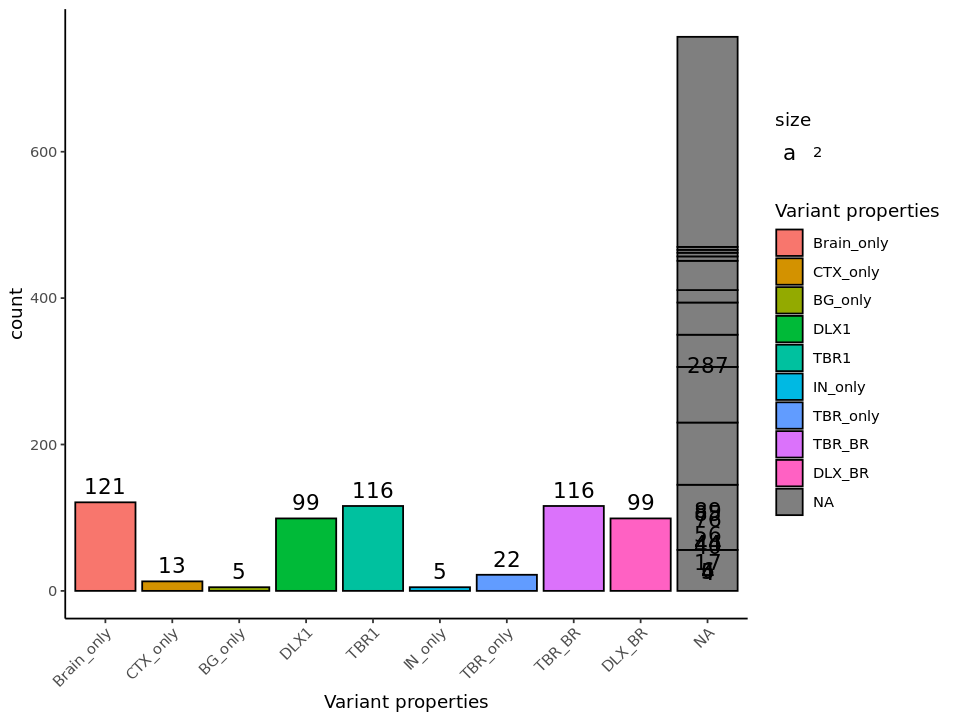

In [46]:
xxx<-factor(rownames(data), level=c("Total","Brain_only","CTX_BG_only","CTX_only","BG_only",
                                    "THAL_only","Left_only","Right_only","DLX1","TBR1","COUPTF2","NeuN","LHX2","Olig2","PU1","DARPP32M-NeuNP",
                                    "DARPP32P-NeuNP","IN_only","COUP_only","TBR_only","TBR_BR","DLX_BR",'MSN_BR','nonMSN_BR' ,
                                    'L_BR_PF_only','L_BR_F_only','L_BR_P_only','L_BR_O_only','L_BR_Ins_only',
                                    'R_BR_PF_only','R_BR_F_only','R_BR_P_only','R_BR_O_only','R_BR_Ins_only'))

options(repr.plot.width=8,repr.plot.height=6)
ggplot(data=data, aes(x=xxx, y=count, fill=xxx)) +
geom_bar(colour="black",stat='identity')+theme_classic() + labs(x='Variant properties', colour = "Variant properties", fill="Variant properties")+
geom_text(aes(label=data$count, vjust = -0.5, size=2)) + theme(axis.text.x=element_text(angle=45, hjust=1))